<a href="https://colab.research.google.com/github/GresaSm/Deep-Learning-Tutorial/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling Tutorial (using BERTopic)**

---

## **Index:**
- Introduction
- Dataset Overview
- Implementation
- Results and Visualizations
- Evaluation and Metrics

---

## Introduction

This is a comprehensive tutorial on topic modeling using BERTopic, tecnique that integrates transformer embeddings with clustering model algorithms to detect topics across documents.

By the end of this tutorial, you will be able to:

- Understand the Basics: Learn the fundamental concepts behind topic modeling and how BERTopic utilizes the BERT model to improve the accuracy and relevance of identified topics.
- Text Data Preprocessing: Discover best practices for preparing your text data for analysis. This includes data cleaning, preprocessing, and understanding how to format your data for optimal results with BERTopic.
- Model Training and Optimization: Dive into the process of fitting your BERTopic model. Learn how to adjust parameters, understand the model's outputs, and fine-tune your model to get the most accurate topic representations.
- Apply Knowledge to Real-World Data: Use your learned skills to extract meaningful insights from the Global News Dataset
- Interpretation and Analysis: We will cover how to analyze and make sense of the topics generated.


---

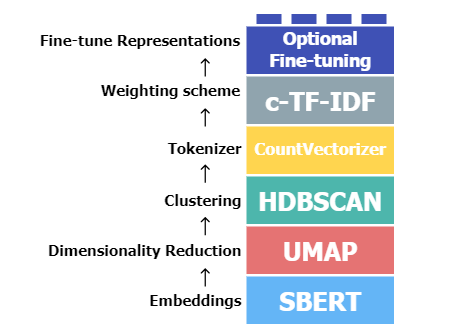

In [2]:
#@title BERTopic

#if this code doesnt work, run with the following line
# pip install Image
from PIL import Image
import requests
url = 'https://github.com/GresaSm/Deep-Learning-Tutorial/blob/main/Images/BERTOpic.png?raw=true'
im = Image.open(requests.get(url, stream=True).raw)
im

[Image source](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmaartengr.github.io%2FBERTopic%2Falgorithm%2Falgorithm.html%23visual-overview)

Steps in BERTopic:

**Grouping of documents**

* **Embeddings**: transformation of the documents into numerical representations. The default is to use sentence-transformers ("all-MiniLM-L6-v2") that capture semantics in the documents. Other embeddings that can be used are SpaCy, Universal Sentende Encoder (USE), Gensim's embeddings like Glove, Word2Vec and FastText, there are more than can be checked [here](https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html#gensim).
* **Dimensionality Reduction**: This step is crucial because the embeddings can be very high-dimensional and computationally heavy. This can be done through UMAP as a default, PCA and Truncated SVD. Other techniques can be checked [here](https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html).
* **Clustering**: The default is HDBSCAN, a density-based clustering technique. In this step similar documents or embeddings are grouped together. Other clustering algorithms that can be used are k-means, agglomerative clustering and cuML HDBSCAN, they can be explored more [here](https://maartengr.github.io/BERTopic/getting_started/clustering/clustering.html#agglomerative-clustering).

**Topic title formation**

* **Vectorizer**: This steps create the topic representations as topic-term matrices. This step can use remove stopwords, remove unfrequent words, select the amount of words in the topic matrix, you can see more [here](https://maartengr.github.io/BERTopic/getting_started/vectorizers/vectorizers.html#decay).
* **Weighting Scheme**: The TF-IDF was adjusted to work on clusters - c-TF-IDF. This method considers differences in documents from one topic to the other. Each cluster is converted into a single document containing all the documents that make it up, from the past step. Then it is used to weight and find important terms in each topic. Several formulas can be used here like c-TF-IDF, bm25_weighting, reduce frequent words. Further explanations can be found [here](https://maartengr.github.io/BERTopic/getting_started/ctfidf/ctfidf.html#reduce_frequent_words).
* **Representation Tunning**: This step will output the representation of the topic. There is a KeyBertInspired (using keywords), a PartsOfSpeech (takes into account the keywords' part of speech), and MaximalMarginalRelevance (maximize diversity of keywords). More options [here](https://maartengr.github.io/BERTopic/getting_started/representation/representation.html#zero-shot-classification).
* **LLM & Generative AI** The topics can be fine-tuned using text generation LLMs. Labels, summaries, poems of topics and more can be generated. More on this topic [here](https://maartengr.github.io/BERTopic/getting_started/representation/llm.html).


---

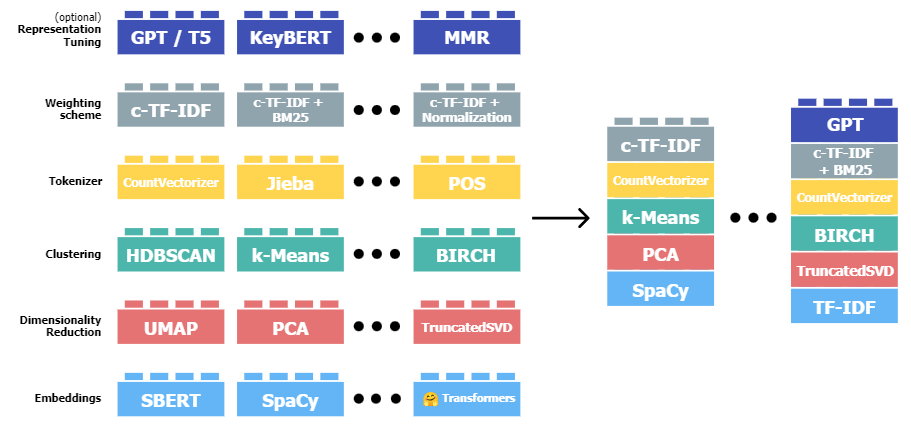

In [3]:
#@title BERTopic modularity
url = 'https://github.com/GresaSm/Deep-Learning-Tutorial/blob/main/Images/modularity.png?raw=true'
im = Image.open(requests.get(url, stream=True).raw)
im

[Image source](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmaartengr.github.io%2FBERTopic%2Falgorithm%2Falgorithm.html%23visual-overview)

## Dataset Overview

In this tutorial, we will be working with the "Global News Dataset" from Kaggle, meticulously compiled by Kumar Saksham in 2023. This dataset is a rich collection of more than 100,000 news articles sourced from NewsAPI, an acclaimed news aggregation service. These articles, published between October 1, 2023, and November 29, 2023, originate from over 2,000 diverse media sources.

We have curated a selection of articles across 9 categories ('Politics', 'Europe', 'America', 'Climate', 'News', 'Ukraine', 'Palestine', 'State of Israel', and 'Russian Federation') to provide a comprehensive overview of current geopolitical dynamics. This selection is designed to offer a balanced and representative sample of global news, giving us an excellent foundation for exploring topic modeling with BERTopic.

---


## Implementation

### Step 1: install and import libraries

In [35]:
# Data processing libraries
import pandas as pd
import numpy as np
import re
import ast
import nltk
import os
import requests

from io import StringIO
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#This takes around 1min
# Install BERTopic
!pip install bertopic


  Using cached bertopic-0.16.0-py2.py3-none-any.whl (154 kB)
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039164 sha256=88ebc8a166e9a83a639138764e3d9ea4ef065633427cfe298ba72804c6082f8e
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455

In [8]:
#Import model libraries #~1min
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.vectorizers import ClassTfidfTransformer

### Step 2: Load the data

In [9]:

# URL of the raw dataset
url = 'https://raw.githubusercontent.com/GresaSm/Deep-Learning-Tutorial/main/Data/preprocessed_subset_english_news.csv'

# Download the dataset
response = requests.get(url)
response.raise_for_status()  # Check that the request was successful

# Use StringIO to convert the text data into a DataFrame
data = StringIO(response.text)
df = pd.read_csv(data)

In [10]:
df.head()

,title,published_at,category,full_content,preprocessed_content
0,Vienna Jewish cemetery torched,2023-11-02 04:31:58.000000,Europe,The Jewish section of a major cemetery in the ...,jewish section major cemeteri austrian capit s...
1,Bill Ackman says it's 'pathetic' that law firm...,2023-11-02 11:14:13.000000,Politics,The billionaire investorBill Ackmantook aim at...,billionair investorbil ackmantook aim univers ...
2,Netanyahu is focused on his own political 'sur...,2023-11-02 15:58:14.000000,Politics,A 30-year veteran of the Israel Defense Forces...,veteran israel defens forc former head countri...
3,Democrats sound alarms over No Labels third-pa...,2023-11-02 20:20:50.000000,Politics,Former House Speaker Nancy Pelosi is advocatin...,former hous speaker nanci pelosi advoc thirdpa...
4,"Amid Hezbollah-Israel clashes, Christian villa...",2023-11-02 06:07:16.000000,Politics,"In Pictures At Lebanon’s border with Israel, r...",pictur lebanon border israel resid christian v...


## Step 3: Preprocessing the data

When dealing with a dataset like the Global News Dataset from Kaggle, which includes a vast amount of news articles from diverse sources, specific preprocessing steps can significantly influence the effectiveness of BERTopic. Thus, this tutorial focuses on removing stop words and performing targeted lemmatization and incorporating n-grams.

- Relevance of Stop Words Removal: Stop words (common words like 'the', 'is', 'at', etc.) usually offer little value in understanding the main topics of a text. By removing these, you can reduce the noise in the data, allowing BERTopic to focus more on the meaningful words that contribute to the essence of the topics.

- Targeted Lemmatization: This process involves reducing words to their base or root form. In the context of your dataset, which focuses on specific geopolitical regions and issues (like 'Europe', 'Russia', 'Ukraine', etc.), lemmatization helps in consolidating different forms of a word into a single term. This is particularly useful because it helps in accurately grouping content that discusses similar topics even if slightly different word forms are used. This enhances the clarity and consistency of the topics generated by BERTopic. Please note that you could also use full lemmatization and/or stemming depending on the nature of your documents.

- n-grams: instructing the vectorizer to consider both unigrams (single words) and bigrams (pairs of consecutive words). This approach captures both individual words and the context provided by word pairs, which is crucial for accurate topic modeling in news articles where specific phrases can carry significant meaning.



In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import spacy

#Stopwords list
stopwords = list(stopwords.words('english')) + ['said', "year", "also"]

# Remove stopwords that can pollute topics
vectorizer_model = CountVectorizer(ngram_range=(1, 2),
                                   stop_words=stopwords)

In [12]:

# Targeted lemmatization function
def lemmatize_and_remove_numbers(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Lemmatize specific words and remove numbers
    lemmatized_tokens = []
    for token in tokens:
        token_lower = token.lower()
        if token_lower in ['israel', 'israeli']:
            lemmatized_tokens.append('israel')
        elif token_lower in ['russia', 'russian']:
            lemmatized_tokens.append('russia')
        elif token_lower in ['ukraine', 'ukrainian']:
            lemmatized_tokens.append('ukraine')
        elif not re.fullmatch(r'\d+', token):  # Regex to remove numbers
            lemmatized_tokens.append(token)
    # Reconstruct the text
    return ' '.join(lemmatized_tokens)

# Apply the function to the 'full_content' column
df['full_content'] = df['full_content'].apply(lemmatize_and_remove_numbers)

### Step 4: BERTopic Components


1. **Embedding with a Transformer Model:**
   - **Model Used:** SentenceTransformer('all-MiniLM-L6-v2')
   - **Purpose:** This step involves converting text into numerical representations (embeddings) using a pre-trained model. In your case, 'all-MiniLM-L6-v2' is a compact but effective transformer model, striking a balance between performance and size. It's trained to generate meaningful embeddings for sentences, which are crucial for the subsequent steps.

2. **Dimensionality Reduction with UMAP:**
   - **Model Used:** UMAP
   - **Parameters:**
     - `n_neighbors=15`: Determines the local neighborhood of points. A small value emphasizes local structure, whereas a larger value can capture more of the global structure.
     - `n_components=5`: The number of dimensions to reduce the embeddings to. Fewer dimensions can help in faster processing and sometimes clearer cluster separation.
     - `min_dist=0.05`: The minimum distance between points in the low-dimensional space, controlling how tightly points are allowed to cluster together.
     - `random_state=100`: Ensures reproducibility by using the same seed for the random number generator.
   - **Purpose:** UMAP reduces the dimensionality of the embeddings to make clustering computationally feasible while retaining the essential structures.

3. **Clustering with HDBSCAN:**
   - **Model Used:** HDBSCAN
   - **Parameters:**
     - `min_cluster_size=80`: The smallest size a cluster can be. This prevents too many tiny, insignificant clusters.
     - `min_samples=40`: Used to determine the degree of conservatism in cluster formation. Higher values lead to fewer clusters.
     - `gen_min_span_tree=True`: Generates the minimum spanning tree for analysis, useful for understanding the clustering structure.
     - `prediction_data=True`: Allows predicting which cluster new points would belong to.
   - **Purpose:** HDBSCAN identifies clusters in the data. It's a density-based algorithm, meaning it forms clusters based on the density of points, allowing for varying cluster sizes and shapes.

4. **Cluster Tagging with c-TF-IDF:**
   - **Parameters:**
     - `vectorizer_model`: It's assumed to be a count or frequency vectorizer that converts text to a matrix of token counts or frequencies.
     - `top_n_words=5`: This parameter in BERTopic indicates how many words are used to represent the topic.
     - `language='english'`: Specifies the language for the model, which affects preprocessing like stopword removal.
     - `calculate_probabilities=True`: If true, calculates the probabilities of topics per document.
     - `verbose=True`: Provides more detailed logging of the process.
   - **Purpose:** Once clusters are formed, c-TF-IDF (class-based Term Frequency-Inverse Document Frequency) is used to identify the words that are most representative of each cluster. This step essentially tags each cluster with a set of keywords that summarize the topic of that cluster.



In [13]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.05,
    random_state=100)

hdbscan_model = HDBSCAN(
    min_cluster_size=80,
    min_samples=40,
    gen_min_span_tree=True,
    prediction_data=True)

ctfidf_model = ClassTfidfTransformer()

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

### Step 5: BERTopic pipeline

Finally, `fit_transform` is called on the dataset (`df['full_content']`), which applies all the previous steps to the data, resulting in identified topics and their probabilities. Each document in the dataset is assigned to a topic, with `topics` containing the topic numbers and `probs` containing the probabilities of the topics for each document.

In [14]:
# this takes around 16-18 minutes
model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(df['full_content'])

2023-12-14 12:30:40,642 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/152 [00:00<?, ?it/s]

2023-12-14 12:45:39,813 - BERTopic - Embedding - Completed ✓
2023-12-14 12:45:39,816 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-14 12:46:21,475 - BERTopic - Dimensionality - Completed ✓
2023-12-14 12:46:21,479 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-14 12:46:22,213 - BERTopic - Cluster - Completed ✓
2023-12-14 12:46:22,229 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-14 12:46:44,127 - BERTopic - Representation - Completed ✓


## Results

The next table shows the results of the model, where:

- Topic is the lists unique identifiers for each topic discovered by the model. The number -1 represents noise or outliers which do not fit well into any topic.

- Count shows the number of documents that have been associated with each topic. For example, Topic 0 has 1046 documents, suggesting that this topic is quite prevalent in the dataset.

- Name represents the concatenation of the most representative words or terms of the topic.

- Representation lists the most representative words for each topic, providing a quick overview of the topic's content. These words are extracted using the c-TF-IDF method, highlighting terms that are important for a topic and distinguishing it from others.

- Representative Docs shows a snippet from a document that is representative of the topic.

In [15]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1046,-1_people_israel_news_would,"[people, israel, news, would, new]",[One of the most startling scientific discover...
1,0,700,0_ukraine_russia_military_forces,"[ukraine, russia, military, forces, war]","[People 's Daily Online ( Xinhua ) 13:57 , Nov..."
2,1,684,1_shares_stock_company_quarter,"[shares, stock, company, quarter, rating]",[Prudent Man Advisors LLC lessened its positio...
3,2,583,2_climate_change_water_november,"[climate, change, water, november, global]",[Climate change is affecting practically every...
4,3,548,3_israel_gaza_hamas_palestinian,"[israel, gaza, hamas, palestinian, war]","[As the Israel-Hamas war enters the 39th day ,..."
5,4,358,4_media_news_new_google,"[media, news, new, google, digital]",[The early years sector—nurseries and childmin...
6,5,211,5_trump_biden_house_republican,"[trump, biden, house, republican, president]",[As Republicans attempt to once again elect a ...
7,6,201,6_court_state_election_government,"[court, state, election, government, elections]",[The Deputy Director of the Socio-Economic Rig...
8,7,148,7_film_marvel_season_series,"[film, marvel, season, series, star]",[This week brings the eighth and final episode...
9,8,143,8_people_police_jail_israel,"[people, police, jail, israel, mattingly]",[A debate over the war between israel and Hama...


### Visualizations

### Figure 1
In the process of topic modeling with BERTopic, after fitting the model to your dataset and identifying topics, a key step is interpreting the topics. The bar chart (fig 1) displays the most representative words for selected topics along with their corresponding c-TF-IDF scores. In simple terms, it measures how important a word is to a topic, compared to its frequency across all topics.

In [16]:
# Top topic keywords
fig_1=model.visualize_barchart()

In [17]:
fig_1

### Figure 2

BERTopic provides a line graph (fig 2) that illustrates how term importance declines within topics. This visualization helps in understanding the distribution of term significance and the relative importance of the top terms within each topic. The x-axis represents the rank of terms within a topic, starting with the most important term (rank 1) and proceeding to the least important (rank 5, in this case). The y-axis shows the c-TF-IDF score of each term. The score quantifies how important a term is to a topic relative to its frequency across all topics.

In [18]:
#Term rank decrease
fig_2= model.visualize_term_rank()

In [19]:
fig_2

### Figure 3

Figure 3 shows an Intertopic Distance Map, which helps us understand how topics relate to one another in a lower-dimensional space.  Each bubble on the map represents a different topic found in the dataset. The size of the bubble often correlates with the number of documents that belong to that topic. Furthermore, D1 and D2 are the two dimensions that result from the dimensionality reduction process. The closer two bubbles are on the map, the more similar they are in terms of their content.

In [20]:
# Intertopic distance
fig_3=model.visualize_topics()

In [21]:
fig_3

### Figure 4

BERTopic offers a dendrogram visualization to represent hierarchical clustering (fig 4). The scale is typically from 0 to 1, where 0 means no distance (identical clusters), and 1 represents the maximum distance found in the clustering.

In [22]:
#Hierarchical Clustering
fig_4= model.visualize_hierarchy(top_n_topics=10)

In [23]:
fig_4

### Figure 5
A Similarity Matrix (fig 5) is another powerful visualization tool that allows us to see how topics in a dataset relate to each other in terms of their content. The diagonal cells compare each topic to itself, so they are always the darkest, representing a similarity score of 1.

On the other hand, a dark off-diagonal cell indicates that the corresponding topics are very similar. A light off-diagonal cell means the topics are quite different.

In [24]:
#Similarity Matrix
fig_5=model.visualize_heatmap()

In [25]:
fig_5

---
## Evaluation and Metrics
Evaluating the quality and coherence of a topic model is crucial in ensuring that the model accurately reflects the underlying themes and discussions within your dataset. Topic modeling, unlike many other machine learning tasks, does not have a straightforward evaluation metric like accuracy or F1 score, since it often deals with unsupervised learning where true labels or structures are not known. Thus, evaluation must rely on both quantitative and qualitative measures.

### Qualitative Evaluation: Interpretability and Coherence
- Interpretability

Interpretability involves looking at the topics and asking if they make sense. Are the top words related? Can you assign a clear label to each topic? Would someone unfamiliar with the dataset understand the theme of each topic?

- Representative Documents

Another way to qualitatively evaluate topics is to read through a sample of the representative documents for each topic. Do the documents that are supposed to be about the same topic actually discuss similar themes?

### Quantitative Evaluation: Metrics

There are several automated topic coherence metrics, such as UMass, UCI, NPMI, and C_V. These metrics compare the top words in each topic to see how often they co-occur in the same documents within the corpus, with the idea being that words that frequently appear together are more likely to constitute a coherent topic.


### Coherence Metrics
- C_v Coherence: coherence measure that uses a sliding window, a one-set segmentation of the top words, and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity. The 'C_v' measure is based on a sliding window, a one-preceding segmentation of the top words, and an indirect confirmation measure to provide a numeric value that is indicative of the coherence of the topics. A higher C_v score (closer to 1)indicates better topic coherence.

- C_umass Coherence: This is also known as UMass coherence and is based on document co-occurrence counts. It is a measure of how much the words in a topic co-occur in the documents compared to what would be expected if they were distributed at random. A higher (closer to 0) UMass score typically indicates better coherence. Unlike C_v, which is bounded between 0 and 1, UMass can have negative values. In general, the more negative the UMass score is, the less coherent the topic.

In [26]:
!pip install gensim


In [27]:
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Create a dictionary and a corpus needed for Topic Coherence
words = model.get_topic_info()
words = words[words['Topic'] != -1]
dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in df['full_content']])
corpus = [dictionary.doc2bow(simple_preprocess(doc)) for doc in df['full_content']]

# Extract the words per topic to create coherence model input
topics = [[word for word, _ in model.get_topic(topic)] for topic in range(len(set(words['Topic'])))]

# C_v coherence
cv_coherence_model = CoherenceModel(topics=topics, texts=[simple_preprocess(doc) for doc in df['full_content']], dictionary=dictionary, coherence='c_v')
cv_coherence = cv_coherence_model.get_coherence()

# C_umass coherence
c_umass_coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
c_umass_coherence = c_umass_coherence_model.get_coherence()

# Print coherence values
print(f"C_v Coherence: {cv_coherence}")
print(f"C_umass Coherence: {c_umass_coherence}")


C_v Coherence: 0.7583056177391888
C_umass Coherence: -1.9891590919487059


## Conclusion of metrics results

- The C_v coherence value of approximately 0.75 suggests that the topics are relatively coherent, meaning the top words within topics are more semantically similar to each other than they would be by chance.
- The C_umass coherence value of approximately -1.99 suggests lower coherence. While it is not unusual for C_umass values to be negative, values closer to 0 would typically be indicative of more coherent topics. Negative values suggest that the top words are not as frequently co-occurring in the same documents as might be expected in a coherent topic.

These values should be interpreted relatively, as the absolute values can be less informative than the comparison between different models or settings within the same dataset.

## Bonus:

Sentiment Analysis on topics defined by the model

Once you have a defined set of topics, other applications like sentiment analysis can be done on them to define associated feelings.

Sentiment Analysis focuses on assigning probabillities of potential sentiments to each document. Models of this tytpe usually classify into *positive, negativa or netural* or can have a wider range or sentiments like *anger, sadness and love*.

Load necessary packages

In [28]:
from transformers import pipeline

Put the topic labels in the dataframe

In [29]:
print(len(df),len(probs))

4851 4851


In [30]:
#use probabilitie from the model to create a dataframe with the first 3 important words
#of each topic as the column headliner
topics_df = pd.DataFrame(probs, columns = ['ukraine_russia_military',
                               'shares_stock_company',
                               'climate_change_water',
                               'israel_gaza_hamas',
                               'media_news_new',
                               'trump_biden_house',
                               'court_state_election',
                               'film_marvel_season',
                               'people_police_jail',
                               'china_chinese_xi',
                               'film_updates_shared'])

topics_df.head()

,ukraine_russia_military,shares_stock_company,climate_change_water,israel_gaza_hamas,media_news_new,trump_biden_house,court_state_election,film_marvel_season,people_police_jail,china_chinese_xi,film_updates_shared
0,1.256785e-308,5.456373e-309,1.005495e-308,5.297707e-308,2.411506e-308,2.001675e-308,1.456748e-308,2.227906e-308,1.000000e+00,1.156288e-308,1.948584e-308
1,2.292512e-02,1.199911e-02,2.115423e-02,5.487191e-02,6.905305e-02,4.192192e-02,2.749030e-02,5.964518e-02,1.489575e-01,2.430340e-02,4.112090e-02
2,1.238321e-308,4.739142e-309,7.938553e-309,1.000000e+00,1.398227e-308,1.488327e-308,1.133344e-308,1.289180e-308,4.836812e-308,1.007653e-308,1.276311e-308
3,1.399436e-308,5.858988e-309,1.056750e-308,1.587280e-308,1.896341e-308,1.000000e+00,1.088009e-308,1.723846e-308,2.757908e-308,1.334388e-308,1.348043e-308
4,4.234513e-02,1.788913e-02,2.878711e-02,4.267383e-01,5.029366e-02,4.661285e-02,3.833692e-02,4.508862e-02,1.370156e-01,3.469739e-02,4.332315e-02


In [31]:
#set a new column in the original data with the labels of topics
df['topic_label'] = topics_df.idxmax(axis = 1)
df.topic_label

0            people_police_jail
1            people_police_jail
2             israel_gaza_hamas
3             trump_biden_house
4             israel_gaza_hamas
                 ...           
4846       climate_change_water
4847    ukraine_russia_military
4848       shares_stock_company
4849       shares_stock_company
4850       shares_stock_company
Name: topic_label, Length: 4851, dtype: object

Load the model's basic pipeline



In [82]:
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Use the model in the dataframe. This takes 58 minutes and 52 seconds.

In [48]:
df.head()

,title,published_at,category,full_content,preprocessed_content,topic_label
0,Vienna Jewish cemetery torched,2023-11-02 04:31:58.000000,Europe,The Jewish section of a major cemetery in the ...,jewish section major cemeteri austrian capit s...,people_police_jail
1,Bill Ackman says it's 'pathetic' that law firm...,2023-11-02 11:14:13.000000,Politics,The billionaire investorBill Ackmantook aim at...,billionair investorbil ackmantook aim univers ...,people_police_jail
2,Netanyahu is focused on his own political 'sur...,2023-11-02 15:58:14.000000,Politics,A 30-year veteran of the israel Defense Forces...,veteran israel defens forc former head countri...,israel_gaza_hamas
3,Democrats sound alarms over No Labels third-pa...,2023-11-02 20:20:50.000000,Politics,Former House Speaker Nancy Pelosi is advocatin...,former hous speaker nanci pelosi advoc thirdpa...,trump_biden_house
4,"Amid Hezbollah-Israel clashes, Christian villa...",2023-11-02 06:07:16.000000,Politics,In Pictures At Lebanon ’ s border with israel ...,pictur lebanon border israel resid christian v...,israel_gaza_hamas


In [83]:
#Make a random sample for each topic
sample = df.groupby('topic_label')['title','published_at','category','preprocessed_content','topic_label'].apply(lambda s: s.sample(100))


In [84]:
#turn it into a dataframe
sample = pd.DataFrame(sample)

In [94]:
# chop preprocessed text into 512 words
" ".join((sample['preprocessed_content'][0]).split(" ")[:300])

476

In [99]:
classifier(" ".join((sample['preprocessed_content'][0]).split(" ")[:300]))

[[{'label': 'anger', 'score': 0.012851499021053314},
  {'label': 'disgust', 'score': 0.0006200947682373226},
  {'label': 'fear', 'score': 0.007698580157011747},
  {'label': 'joy', 'score': 0.6094140410423279},
  {'label': 'neutral', 'score': 0.17331552505493164},
  {'label': 'sadness', 'score': 0.026401076465845108},
  {'label': 'surprise', 'score': 0.16969919204711914}]]

In [100]:
#11 min
sent_scores = []
sentiment = []

# Iterate over each row in the DataFrame
for i in range(0,len(sample)):
    # Get the title from the DataFrame
    content = " ".join((sample['preprocessed_content'][i]).split(" ")[:300])

    # Classify and get all scores
    sentiment_scores = classifier(content, truncation = True)

    # Convert to DataFrame and find the sentiment with the highest score
    sentiment_df = pd.DataFrame(sentiment_scores[0])
    max_sentiment = sentiment_df[sentiment_df.score == sentiment_df.score.max()].iloc[0]

    # Update the DataFrame with the sentiment and score
    sent_scores.append(max_sentiment['label'])
    sentiment.append(max_sentiment['score'])

In [101]:
sample['sent_scores'] = sentiment
sample['sentiment'] = sent_scores

In [102]:
sample.reset_index(drop = True, inplace = True)

In [103]:
# Group by 'Media' and 'sentiment', then calculate the article count
grouped_data = sample.groupby(['topic_label', 'sentiment']).size().reset_index(name='article_count')
grouped_data.head()

,topic_label,sentiment,article_count
0,china_chinese_xi,anger,9
1,china_chinese_xi,fear,39
2,china_chinese_xi,joy,46
3,china_chinese_xi,neutral,1
4,china_chinese_xi,sadness,4


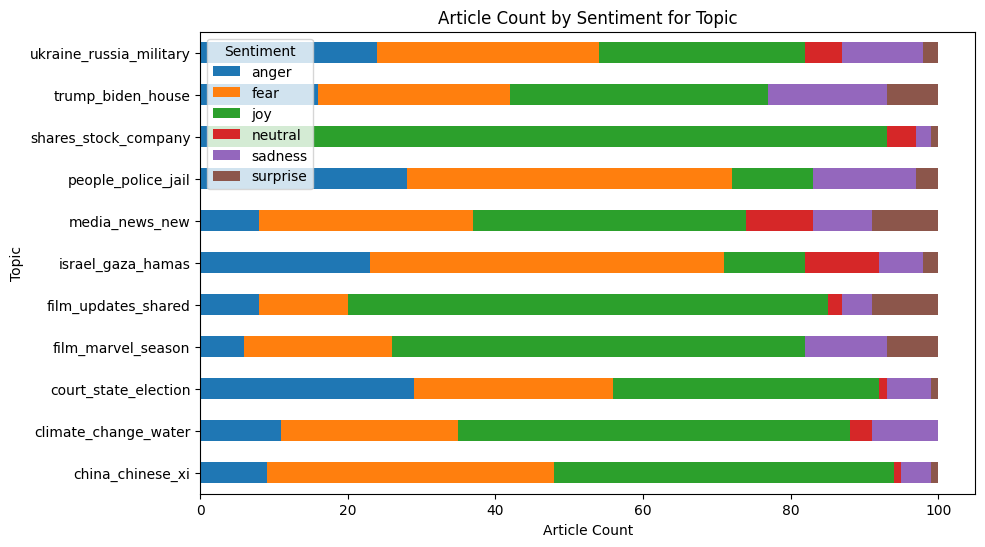

In [104]:
import matplotlib.pyplot as plt

# Pivot the data to get 'Sentiment' as index, 'Topic_labels' as columns, and 'article_count' as values
pivot_data = grouped_data.pivot(index='topic_label', columns='sentiment', values='article_count').fillna(0)

# Plotting
pivot_data.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.title('Article Count by Sentiment for Topic')
plt.xlabel('Article Count')
plt.ylabel('Topic')
plt.legend(title='Sentiment')
plt.show()